# Allen Institute Visual Behavior 2P

The dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.

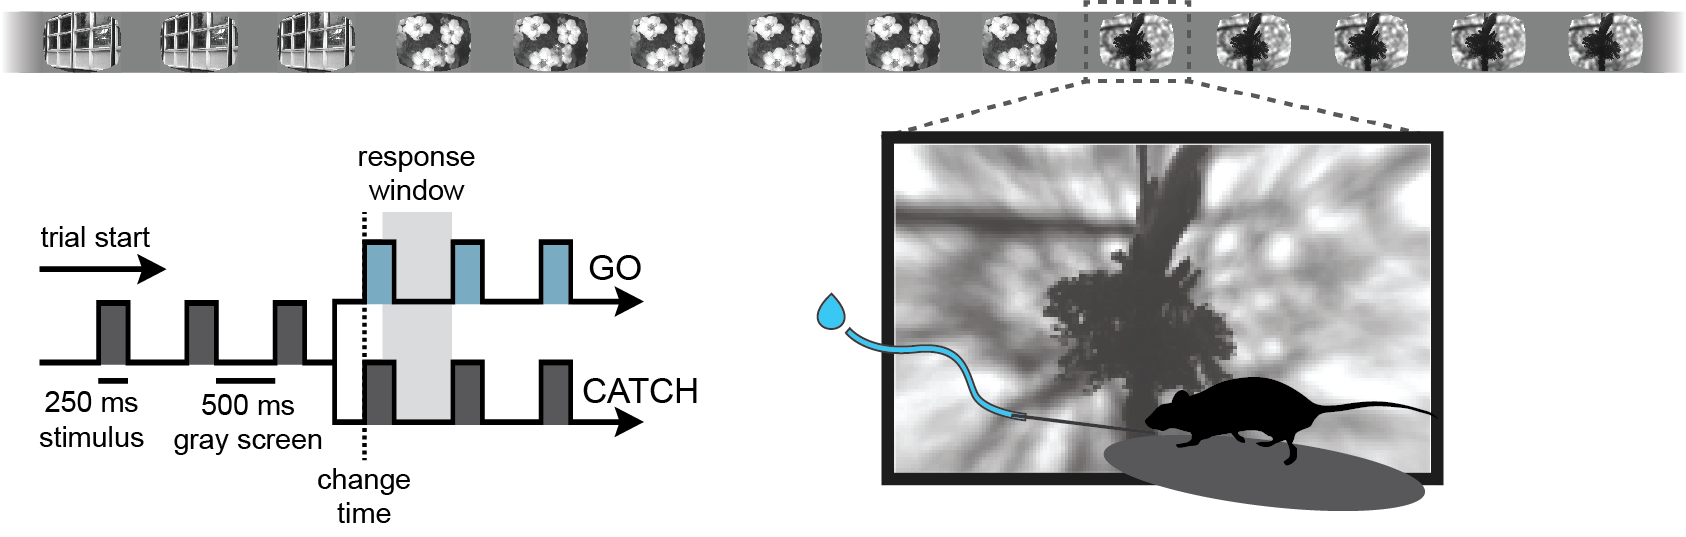

In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.

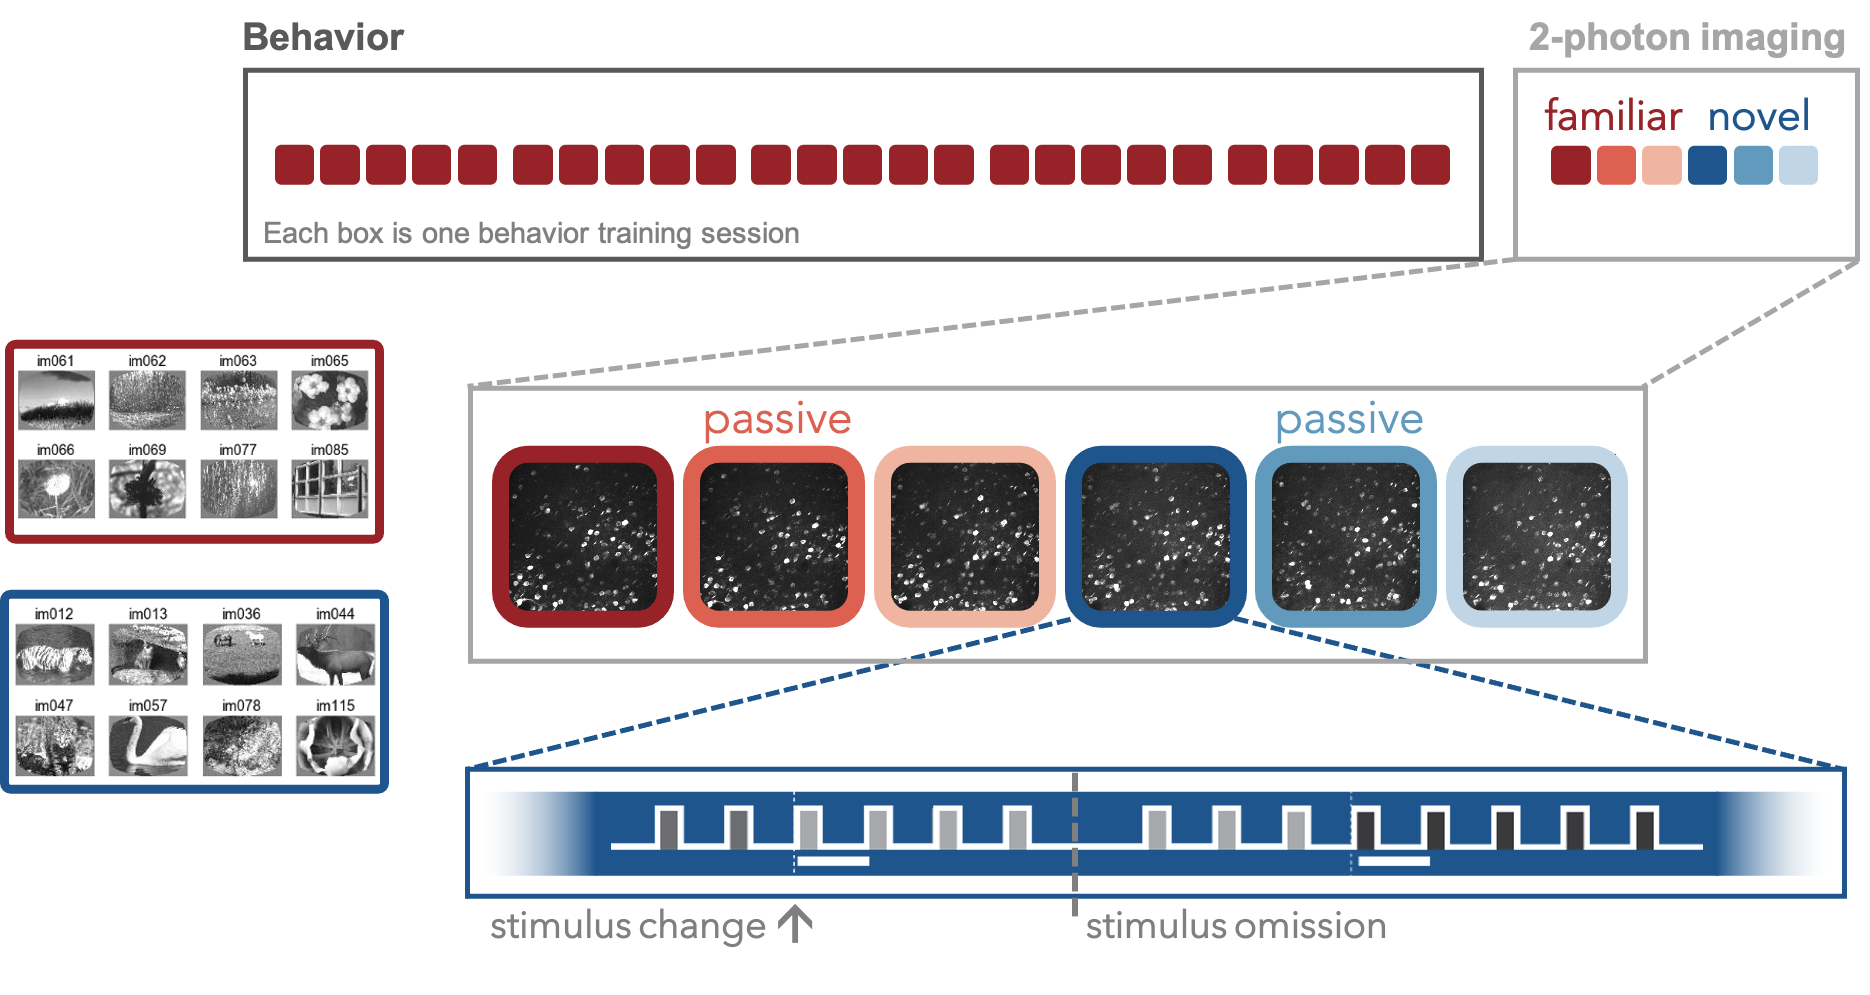

##### Multiple cortical areas and depths were measured concurently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.

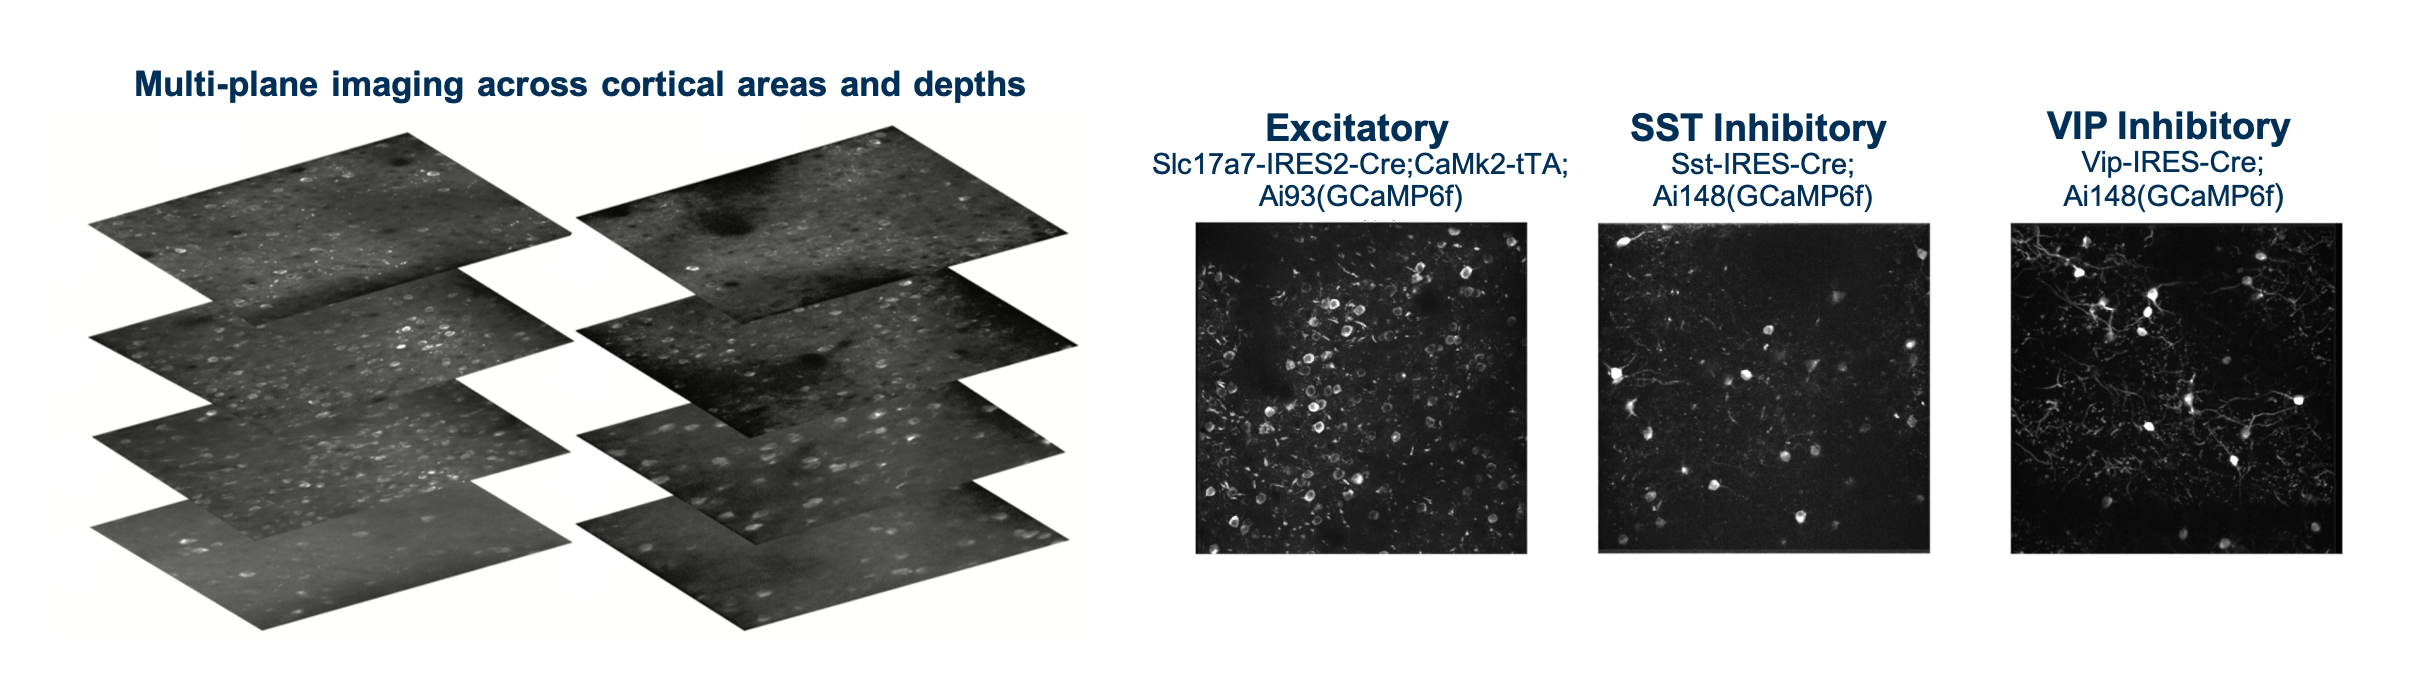

# Loading the data

In [2]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet
!pip install  pyarrow # may be needed to read data file

In [3]:
# @title Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [4]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [5]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

In [6]:
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
1418771,1295,1086569757,"[-0.026026185601949692, 0.0013103400124236941,...","[-1.2282367960132226, -1.1959147750655061, -1....",0.014715,0.011556,im069,7,True,False,...,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel
355974,2531,1086497807,"[-0.013245929032564163, 0.008828731253743172, ...","[-1.2281102725749526, -1.1957915811914013, -1....",0.020325,0.003100,omitted,8,False,True,...,967200850,957570596,967449308,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,M,182.0,familiar
1493651,3434,1086555432,"[-0.019362948834896088, 0.017347155138850212, ...","[-1.2282367960132226, -1.1959147750655061, -1....",0.091252,0.024021,im085,6,True,False,...,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel
1265434,296,1086558904,"[-0.032418496906757355, 0.1236368864774704, -0...","[-1.2282609373726978, -1.1959382811260477, -1....",0.014385,0.023113,im000,0,True,False,...,1004824790,1000740620,1004844648,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,165.0,familiar
1012237,2100,1086489882,"[-0.018640870228409767, -0.11687903106212616, ...","[-1.227986488876192, -1.1956710549583975, -1.1...",-0.008884,0.008271,im061,3,True,False,...,1004237014,1000740410,1004274963,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,194.0,novel


In [7]:
data.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response', 'image_name',
       'image_index', 'is_change', 'omitted', 'mean_running_speed',
       'mean_pupil_area', 'response_latency', 'rewarded',
       'ophys_experiment_id', 'imaging_depth', 'targeted_structure',
       'cre_line', 'session_type', 'session_number', 'mouse_id',
       'ophys_session_id', 'ophys_container_id', 'behavior_session_id',
       'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex',
       'age_in_days', 'exposure_level'],
      dtype='object')


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




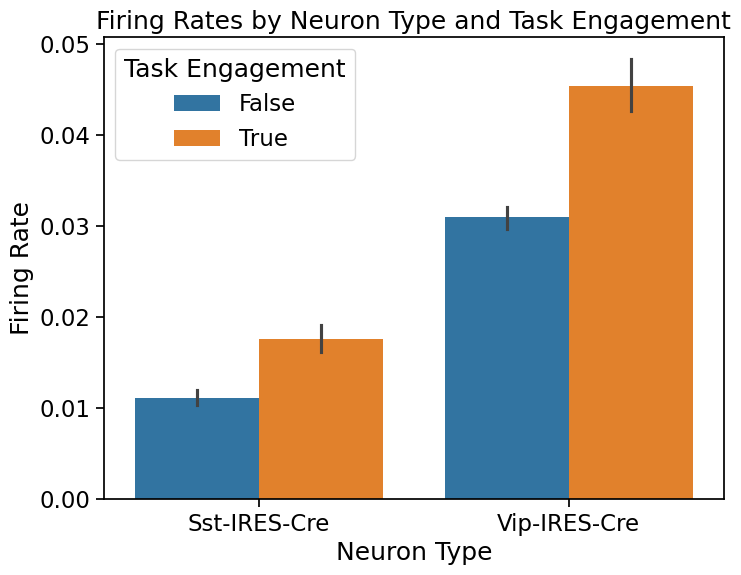

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='cre_line', y='mean_response', hue='rewarded', data=data, ax=ax)
ax.set_title('Firing Rates by Neuron Type and Task Engagement')
ax.set_xlabel('Neuron Type')
ax.set_ylabel('Firing Rate')
ax.legend(title='Task Engagement')
plt.show()

In [9]:
data.rewarded

,rewarded
85,True
86,True
87,True
88,True
89,True
...,...
1709437,False
1709438,False
1709439,False
1709440,False


In [10]:
sex = data['sex']

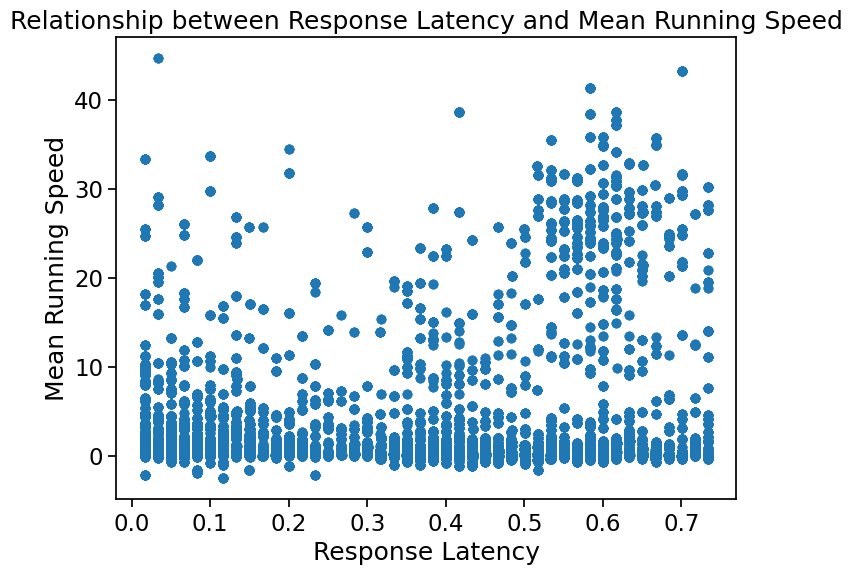

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of F and M values
sex_counts = data['sex'].value_counts()



# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['response_latency'], data['mean_running_speed'])
plt.title('Relationship between Response Latency and Mean Running Speed')
plt.xlabel('Response Latency')
plt.ylabel('Mean Running Speed')
plt.show()

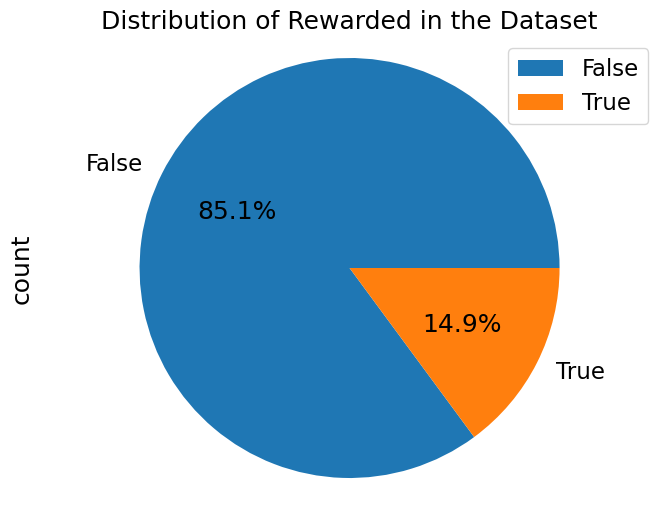

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# Count the number of 'rewarded' values
sex_counts = data['rewarded'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Rewarded in the Dataset')
plt.axis('equal')
plt.legend(sex_counts.index)
plt.show()


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [13]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [14]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [15]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [16]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [17]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [18]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset


VIP DATA WORKTHROUGH

In [19]:
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data['omitted'] == False) & (data['exposure_level'] == "novel")][['cre_line', 'omitted', 'exposure_level', 'rewarded', 'mean_response']]

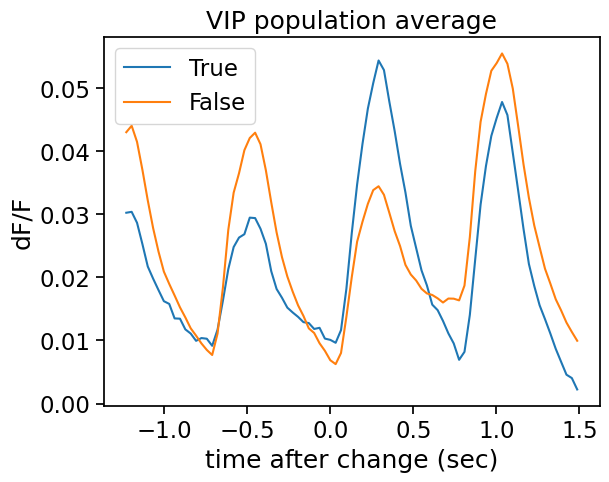

In [20]:
# Assuming 'trace_timestamps' and 'trace' are columns in a different DataFrame called 'data'
timestamps = data.trace_timestamps.values[0]
for rewarded in vip_data.rewarded.unique():
  traces = data[data.rewarded==rewarded].trace.values # Access 'trace' from 'data'
  plt.plot(timestamps, np.mean(traces), label=rewarded)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

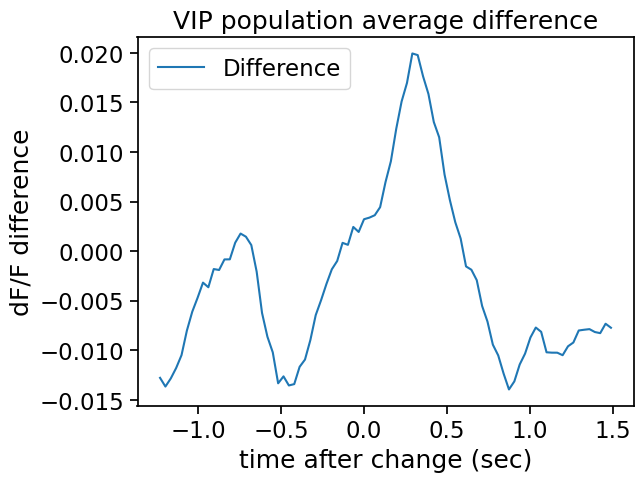

In [21]:
# Assuming 'trace_timestamps' and 'trace' are columns in a different DataFrame called 'data'
timestamps = data.trace_timestamps.values[0]
traces_true = data[data.rewarded==True].trace.values
traces_false = data[data.rewarded==False].trace.values
difference = np.mean(traces_true, axis=0) - np.mean(traces_false, axis=0)
plt.plot(timestamps, difference, label='Difference')
plt.title('VIP population average difference')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F difference')
plt.legend()
plt.show()

SSt data work through

In [22]:
#data1 = [data[(data.cre_line == 'Vip-IRES-Cre')&(data['omitted'] == False) & (data['exposure_level'] == "novel")][['cre_line', 'omitted', 'exposure_level', 'rewarded', 'mean_response']]]

In [23]:
#timestamps = data1.trace_timestamps.values[0]
#for rewarded in data1['rewarded'].unique():
  #traces = data1[data1['rewarded']==rewarded].trace.values
  #plt.plot(timestamps, np.mean(traces), label=rewarded)
#plt.title('data1 population average')
#plt.xlabel('time after change (sec)')
#plt.ylabel('dF/F')
#plt.legend()
#plt.show()

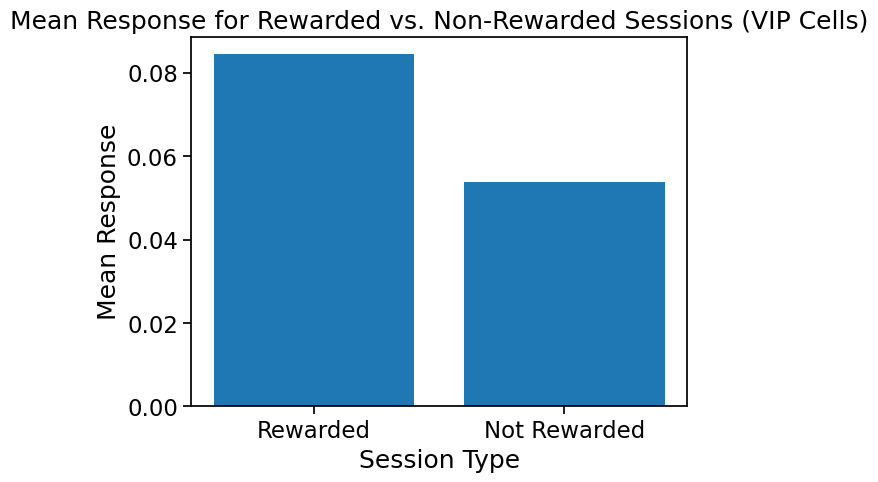

In [24]:
# Calculate mean responses
mean_response_rewarded = vip_data[vip_data['rewarded'] == True]['mean_response'].mean()
mean_response_not_rewarded = vip_data[vip_data['rewarded'] == False]['mean_response'].mean()

# Create a bar plot
import matplotlib.pyplot as plt
plt.bar(['Rewarded', 'Not Rewarded'], [mean_response_rewarded, mean_response_not_rewarded])
plt.xlabel('Session Type')
plt.ylabel('Mean Response')
plt.title('Mean Response for Rewarded vs. Non-Rewarded Sessions (VIP Cells)')
plt.show()

Rewarded group normality p-value: 0.000
Not rewarded group normality p-value: 0.000
Equal variances p-value: 0.000
T-statistic: 8.736430453189849
P-value: 3.153236412313626e-18


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19346.
  res = hypotest_fun_out(*samples, **kwds)


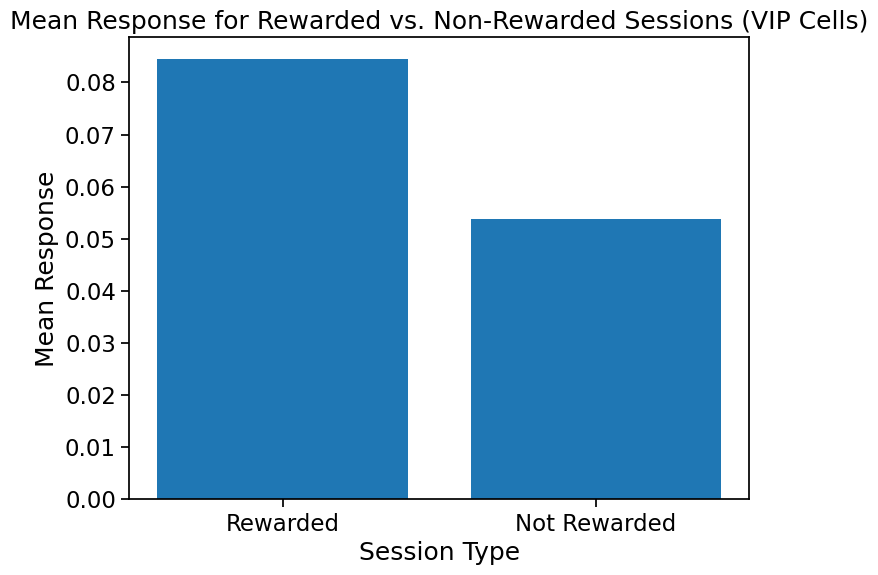

In [25]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# define rewarded and not rewarded
rewarded = vip_data[vip_data['rewarded'] == True]['mean_response'].values
not_rewarded = vip_data[vip_data['rewarded'] == False]['mean_response'].values

# Check for normality
_, rewarded_p = stats.shapiro(rewarded)
_, not_rewarded_p = stats.shapiro(not_rewarded)

print(f"Rewarded group normality p-value: {rewarded_p:.3f}")
print(f"Not rewarded group normality p-value: {not_rewarded_p:.3f}")

# Check for equal variances
_, equal_var_p = stats.levene(rewarded, not_rewarded)

print(f"Equal variances p-value: {equal_var_p:.3f}")

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(rewarded, not_rewarded, equal_var=(equal_var_p > 0.05))

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Create bar plot with significance annotation
plt.figure(figsize=(8, 6))
plt.bar(['Rewarded', 'Not Rewarded'], [np.mean(rewarded), np.mean(not_rewarded)])
plt.xlabel('Session Type')
plt.ylabel('Mean Response')
plt.title('Mean Response for Rewarded vs. Non-Rewarded Sessions (VIP Cells)')

# # Add significance annotation
# if p_value < 0.05:
#     plt.text(0.5, max(np.mean(rewarded), np.mean(not_rewarded)) + 0.1,
#              "*", ha='center', fontsize=14)  # Add a star for significance

plt.show()

Rewarded group normality p-value: 0.000
Not rewarded group normality p-value: 0.000
Equal variances p-value: 0.000
Using Welch's t-test (unequal variances)
T-statistic: 8.736430453189849
P-value: 3.153236412313626e-18


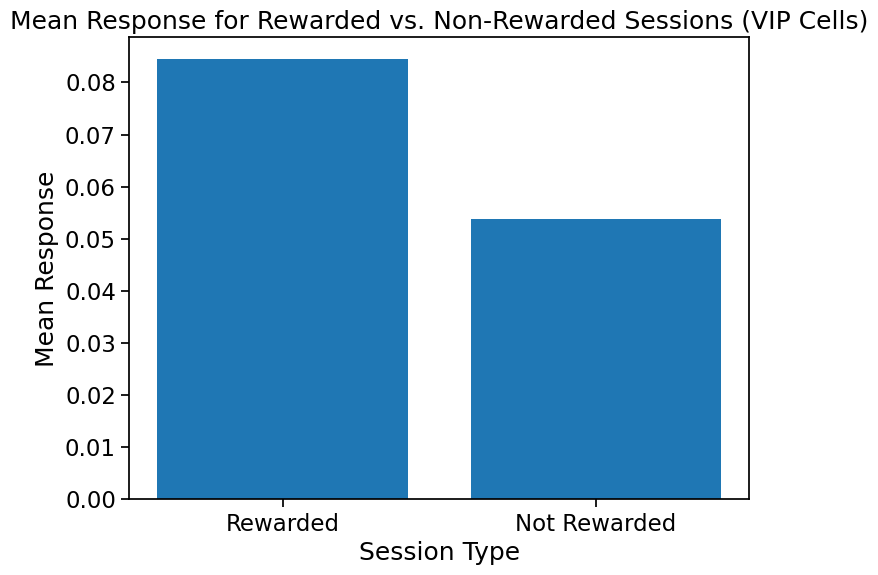

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# define rewarded and not rewarded
rewarded = vip_data[vip_data['rewarded'] == True]['mean_response'].values
not_rewarded = vip_data[vip_data['rewarded'] == False]['mean_response'].values

# Check for normality
_, rewarded_p = stats.shapiro(rewarded)
_, not_rewarded_p = stats.shapiro(not_rewarded)

print(f"Rewarded group normality p-value: {rewarded_p:.3f}")
print(f"Not rewarded group normality p-value: {not_rewarded_p:.3f}")

# Check for equal variances
_, equal_var_p = stats.levene(rewarded, not_rewarded)

print(f"Equal variances p-value: {equal_var_p:.3f}")

# Perform Welch's t-test if equal variances are not assumed
if equal_var_p < 0.05:
    t_statistic, p_value = stats.ttest_ind(rewarded, not_rewarded, equal_var=False)
    print("Using Welch's t-test (unequal variances)")
else:
    t_statistic, p_value = stats.ttest_ind(rewarded, not_rewarded, equal_var=True)
    print("Using standard t-test (equal variances)")

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Create bar plot with significance annotation
plt.figure(figsize=(8, 6))
plt.bar(['Rewarded', 'Not Rewarded'], [np.mean(rewarded), np.mean(not_rewarded)])
plt.xlabel('Session Type')
plt.ylabel('Mean Response')
plt.title('Mean Response for Rewarded vs. Non-Rewarded Sessions (VIP Cells)')

# Add significance annotation
# if p_value < 0.05:
#     plt.text(0.5, max(np.mean(rewarded), np.mean(not_rewarded)) + 0.1,
#              "*", ha='center', fontsize=14)  # Add a star for significance

plt.show()

How are VIP and SST cells affected by stimulus novelty?
Plot the population average change response for familiar and novel images for each cre line

In [27]:
table_one = sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)&(data.exposure_level == 'novel')&(data.omitted == False)]
print(table_one)
#vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

         stimulus_presentations_id  cell_specimen_id  \
144326                          11        1086497034   
144327                          11        1086497129   
144328                          11        1086496500   
144329                          11        1086496368   
144330                          11        1086498071   
...                            ...               ...   
1574968                       4753        1086490807   
1574969                       4753        1086490603   
1575075                       4789        1086490751   
1575076                       4789        1086490807   
1575077                       4789        1086490603   

                                                     trace  \
144326   [0.09050994366407394, 0.3326970636844635, 0.12...   
144327   [0.0, -0.03954680636525154, 0.0071844733320176...   
144328   [0.1347564309835434, 0.042729731649160385, 0.0...   
144329   [-0.007495639380067587, -0.016001390293240547,...   
144330   [-0.0592

In [28]:
data_subset_Sst_rewarded = data[(data['cre_line'] == "Sst-IRES-Cre") & (data['omitted'] == False) & (data['exposure_level'] == "novel") & (data['rewarded'] == True)][['cre_line', 'omitted', 'exposure_level', 'rewarded', 'mean_response']]
print(data_subset_Sst_rewarded )

data_subset_Sst_not_rewarded = data[(data['cre_line'] == "Sst-IRES-Cre") & (data['omitted'] == False) & (data['exposure_level'] == "novel") & (data['rewarded'] == False)][['cre_line', 'omitted', 'exposure_level', 'rewarded', 'mean_response']]
print(data_subset_Sst_not_rewarded )

             cre_line  omitted exposure_level  rewarded  mean_response
144326   Sst-IRES-Cre    False          novel      True      -0.028484
144327   Sst-IRES-Cre    False          novel      True      -0.040156
144328   Sst-IRES-Cre    False          novel      True       0.004317
144329   Sst-IRES-Cre    False          novel      True       0.005127
144330   Sst-IRES-Cre    False          novel      True      -0.005123
...               ...      ...            ...       ...            ...
1574920  Sst-IRES-Cre    False          novel      True       0.003770
1574921  Sst-IRES-Cre    False          novel      True       0.003154
1575075  Sst-IRES-Cre    False          novel      True       0.007475
1575076  Sst-IRES-Cre    False          novel      True      -0.001472
1575077  Sst-IRES-Cre    False          novel      True      -0.000112

[3004 rows x 5 columns]
             cre_line  omitted exposure_level  rewarded  mean_response
146438   Sst-IRES-Cre    False          novel     Fa

Plot the population average change response of SST cells for familiar and novel images

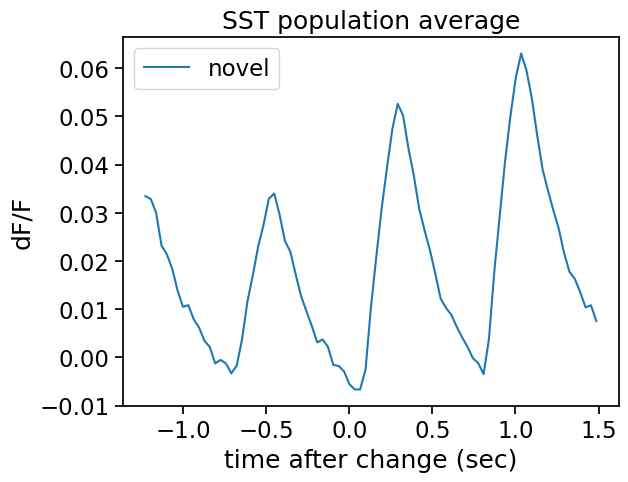

In [29]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

trying to figure this out #1

In [30]:
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data['omitted'] == False) & (data['exposure_level'] == "novel")][['cre_line', 'omitted', 'exposure_level', 'rewarded', 'mean_response']]

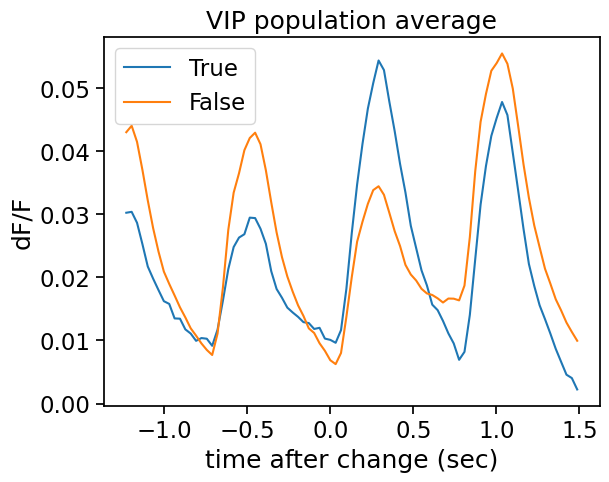

In [31]:
# Assuming 'trace_timestamps' and 'trace' are columns in a different DataFrame called 'data'
timestamps = data.trace_timestamps.values[0]
for rewarded in vip_data.rewarded.unique():
  traces = data[data.rewarded==rewarded].trace.values # Access 'trace' from 'data'
  plt.plot(timestamps, np.mean(traces), label=rewarded)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [32]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.omitted == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.omitted == True)]

Plot the population average omission response of SST cells for familiar and novel images

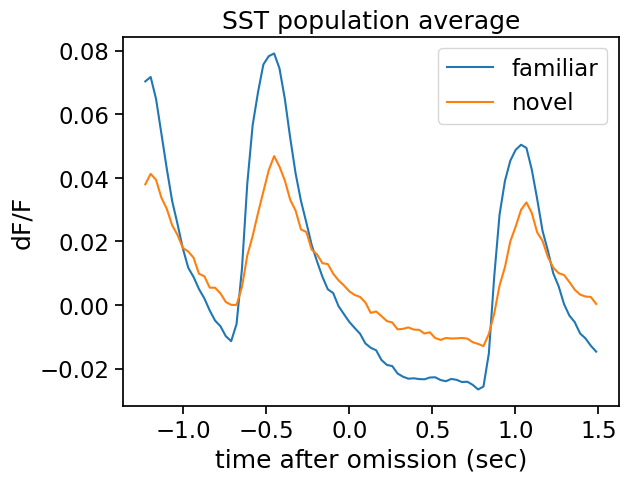

In [33]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot population average omission response of VIP cells for familiar and novel images

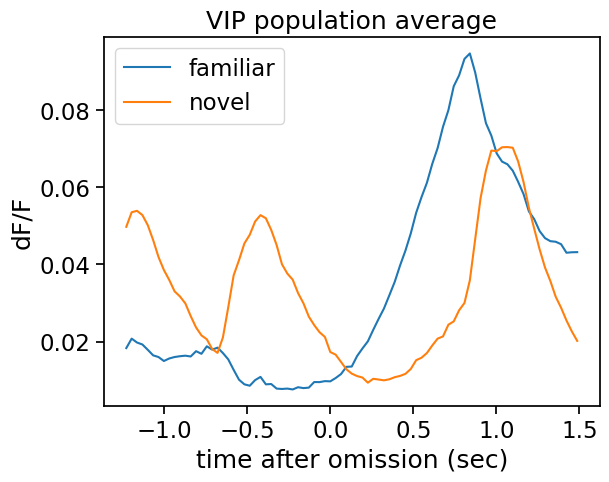

In [34]:
timestamps = vip_data.trace_timestamps.values[0]  # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()